In [1]:
import pandas as pd
import numpy as np

In [4]:
news = pd.read_csv('fakeoreal.csv')

In [5]:
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
news = news.set_index("Unnamed: 0")
news.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6335 entries, 8476 to 4330
Data columns (total 3 columns):
title    6335 non-null object
text     6335 non-null object
label    6335 non-null object
dtypes: object(3)
memory usage: 198.0+ KB


In [8]:
#create training and test sets 
y = news.label 
news.drop("label", axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(news['text'], y, test_size=0.333, random_state=0)

In [9]:
#now need to create classifiers 
#use countvectorizer and tfidfvectorizer to determine if words or tokens affect whether news is real or fake

from sklearn.feature_extraction.text import CountVectorizer 

#use count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

#fit and transform training data 
count_train = count_vectorizer.fit_transform(X_train) 

#transform test data
count_test = count_vectorizer.transform(X_test)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer 

#use tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

#fit and transform training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

#transform test data
tfidf_test = tfidf_vectorizer.transform(X_test)

In [11]:
#train and test data 

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [12]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [13]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
cm = confusion_matrix(y_test, pred)
cm

## can see prettier version of confusion matrix below
## 83% accurate

accuracy:   0.83


array([[ 703,  332],
       [  23, 1052]], dtype=int64)

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Confusion matrix, normalized')
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


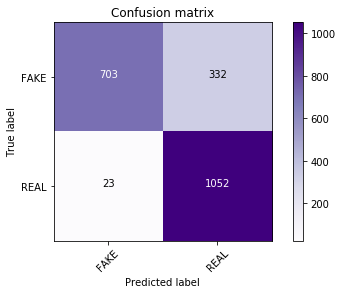

In [15]:
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
plt.show()

In [16]:
clf = MultinomialNB()

In [17]:

clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)

cm2 = confusion_matrix(y_test, pred)
cm2

#89% accurate (better than before)

accuracy:   0.89


array([[873, 162],
       [ 80, 995]], dtype=int64)

Confusion matrix, without normalization


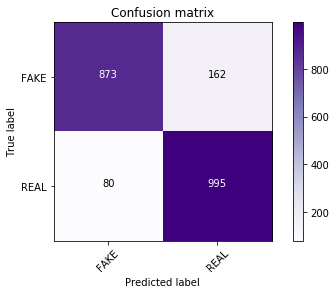

In [18]:
plot_confusion_matrix(cm2, classes=['FAKE', 'REAL'])
plt.show()

In [19]:
#we can see the count vectorizer performs better than tfidf

In [20]:
#we can also try a linear model. Linear models apparently work well with tfidf vectorizers


In [21]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

In [22]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)

#93% accurate (best so far)

accuracy:   0.93


In [23]:
#lets inspect top 10 vectors for fake and real news


In [24]:
def features(vectorizer, classifier, n=100):

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


features(tfidf_vectorizer, linear_clf, n=10)

FAKE -5.4310863032 2016
FAKE -4.15579713186 october
FAKE -3.14204098212 hillary
FAKE -2.97626140864 share
FAKE -2.96289158859 article
FAKE -2.8930195055 november
FAKE -2.76426745906 source
FAKE -2.61888200355 establishment
FAKE -2.48456625983 election
FAKE -2.1260012203 advertisement

REAL 5.21750468336 said
REAL 3.34512714711 says
REAL 2.56947343673 friday
REAL 2.41959031718 fox
REAL 2.28187099473 candidates
REAL 2.13082440673 security
REAL 2.11160352612 state
REAL 2.09046516137 cruz
REAL 2.02562012481 conservatives
REAL 1.99450185333 cnn


In [25]:
feature_names = tfidf_vectorizer.get_feature_names()

#top 10 most fake words
sorted(zip(clf.coef_[0], feature_names))[:10]

[(-13.825188574515545, '0001pt'),
 (-13.825188574515545, '0002'),
 (-13.825188574515545, '000billion'),
 (-13.825188574515545, '005'),
 (-13.825188574515545, '006s'),
 (-13.825188574515545, '007s'),
 (-13.825188574515545, '008s'),
 (-13.825188574515545, '0099'),
 (-13.825188574515545, '00am'),
 (-13.825188574515545, '00p')]

In [26]:
#top 10 most real words
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:10]

[(-4.4816293587531391, 'said'),
 (-4.5973030233236134, 'trump'),
 (-4.9461339124732753, 'clinton'),
 (-5.4804458200979997, 'state'),
 (-5.5125625488405827, 'people'),
 (-5.5164966576766474, 'president'),
 (-5.5331409370841911, 'obama'),
 (-5.5763978408191317, 'new'),
 (-5.6077500367853581, 'campaign'),
 (-5.7262418255722061, 'republican')]

https://github.com/saurabhdiwan34/MyProjects